# Training models

In [2]:
# Lets generate some linear looking data to test linear regression

In [4]:
import numpy as np
np.random.seed(42)  
m = 100             # number of instances
X = 2*np.random.rand(m,1)  #column vector
y= 4 + 3*X + np.random.rand(m,1) #column vector

In [5]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y   #@ perform np.matmul()

In [6]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [9]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best         # matrix multipication
y_predict

array([[ 4.51359766],
       [10.48006601]])

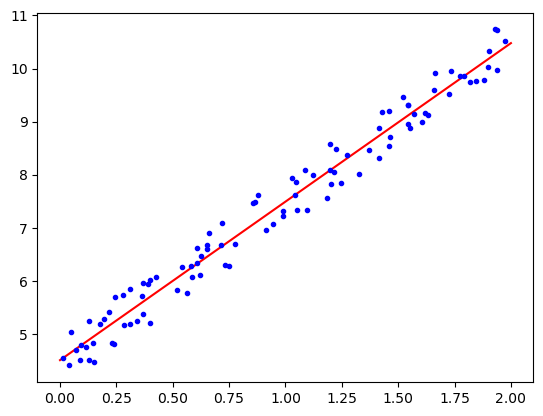

In [11]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [12]:
# performing linear regression using scikit-learn straightforward
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_,lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

# Gradient descent

In [13]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances
np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameters
for epoch in range(n_epochs):
 gradients = 2 / m * X_b.T @ (X_b @ theta - y)
 theta = theta - eta * gradients

In [14]:
theta

array([[4.51359766],
       [2.98323418]])

# Stochastic Gradient descent

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [17]:
 theta

array([[4.51548062],
       [2.9775157 ]])

### Using stochastic gd in linear regression using SGDRegressor

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
 n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.50316965]), array([2.99156535]))